<a href="https://colab.research.google.com/github/AndreaBur/AI_Implementation/blob/main/DataAnalysisCostumer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Valores únicos en 'Atendido por agente': ['No' 'Sí' 'Ya']


<ipython-input-4-36f962812aba>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend = ax.legend(


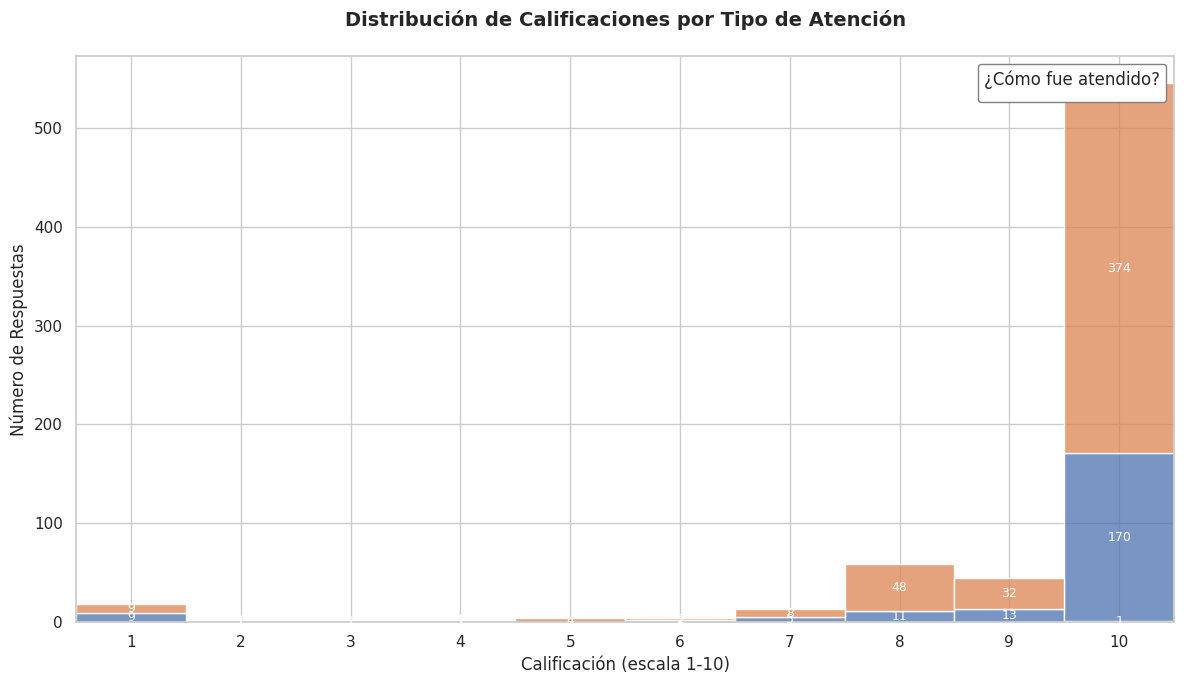

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar y preparar los datos (como en tu código original)
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datos/Copia de ENCUESTA A GRAFICAR - Encuesta a graficar.csv", header=6)
df.dropna(how='all', inplace=True)
df = df.drop_duplicates()
df.columns = df.iloc[0]
df = df[1:]
df_plot = df[['Atendido por agente', 'Calificación']].dropna()
df_plot['Calificación'] = pd.to_numeric(df_plot['Calificación'], errors='coerce')
df_plot.dropna(subset=['Calificación'], inplace=True)

# Verificar los valores únicos en 'Atendido por agente'
print("Valores únicos en 'Atendido por agente':", df_plot['Atendido por agente'].unique())

# Crear una paleta que incluya todos los valores posibles
unique_values = df_plot['Atendido por agente'].unique()
palette = {
    'Sí': '#4c72b0',
    'No': '#dd8452',
    'Ya': '#55a868',  # Añadir el nuevo valor
    # Agregar otros valores si existen
}

# Configuración del gráfico
plt.figure(figsize=(12, 7))
sns.set(style="whitegrid")

# Crear el gráfico de barras apiladas
ax = sns.histplot(
    data=df_plot,
    x='Calificación',
    hue='Atendido por agente',
    multiple='stack',
    palette=palette,
    edgecolor='white',
    binwidth=1,
    binrange=(0.5, 10.5),
    hue_order=sorted(unique_values)  # Asegurar orden consistente
)

# Personalización del gráfico
plt.title('Distribución de Calificaciones por Tipo de Atención\n', fontsize=14, fontweight='bold')
plt.xlabel('Calificación (escala 1-10)', fontsize=12)
plt.ylabel('Número de Respuestas', fontsize=12)
plt.xticks(range(1, 11))
plt.xlim(0.5, 10.5)

# Leyenda mejorada
legend = ax.legend(
    title='¿Cómo fue atendido?',
    title_fontsize=12,
    fontsize=11,
    loc='upper right',
    frameon=True,
    framealpha=1
)
legend.get_frame().set_edgecolor('gray')

# Añadir etiquetas con los valores
total = len(df_plot)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., p.get_y() + height/2,
                f'{int(height)}',
                ha="center", va="center", color='white', fontsize=9)

plt.tight_layout()
plt.show()

<ipython-input-8-a8d7e1dc2a8e>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=df_plot,
<ipython-input-8-a8d7e1dc2a8e>:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_plot,


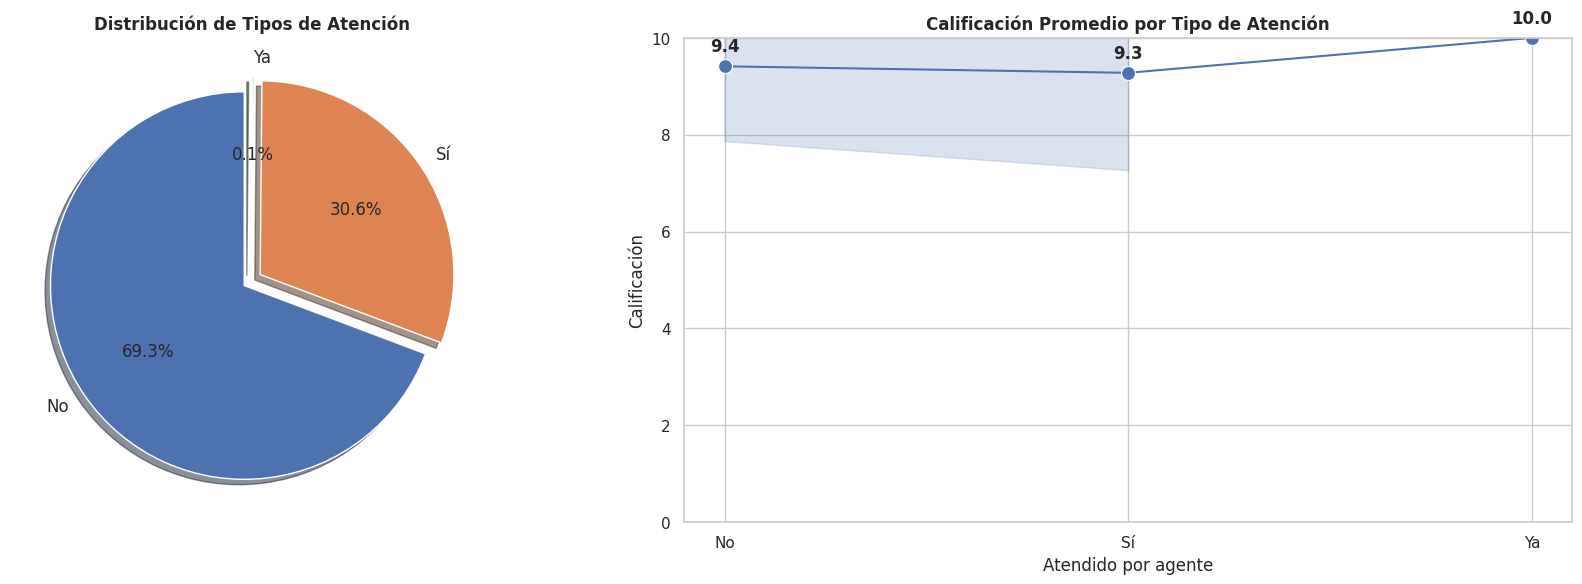

In [ ]:
# Crear figura con dos subplots
promedios = df_plot.groupby('Atendido por agente')['Calificación'].mean().reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Pie chart
atencion_counts.plot.pie(ax=ax1,
                        colors=colors[:len(atencion_counts)],
                        autopct='%1.1f%%',
                        startangle=90,
                        explode=explode[:len(atencion_counts)],
                        shadow=True,
                        textprops={'fontsize': 12})
ax1.set_title('Distribución de Tipos de Atención', fontweight='bold')
ax1.set_ylabel('')

# Line plot
sns.lineplot(data=df_plot,
            x='Atendido por agente',
            y='Calificación',
            ci='sd',
            marker='o',
            markersize=10,
            palette=colors[:len(promedios)],
            ax=ax2)
ax2.set_title('Calificación Promedio por Tipo de Atención', fontweight='bold')
ax2.set_ylim(0, 10)

# Añadir valores al line plot
for i, row in promedios.iterrows():
    ax2.text(i, row['Calificación']+0.3,
            f"{row['Calificación']:.1f}",
            ha='center',
            fontweight='bold')

plt.tight_layout()
plt.show()

<ipython-input-9-bbdd72040bde>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.lineplot(data=df_plot,
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


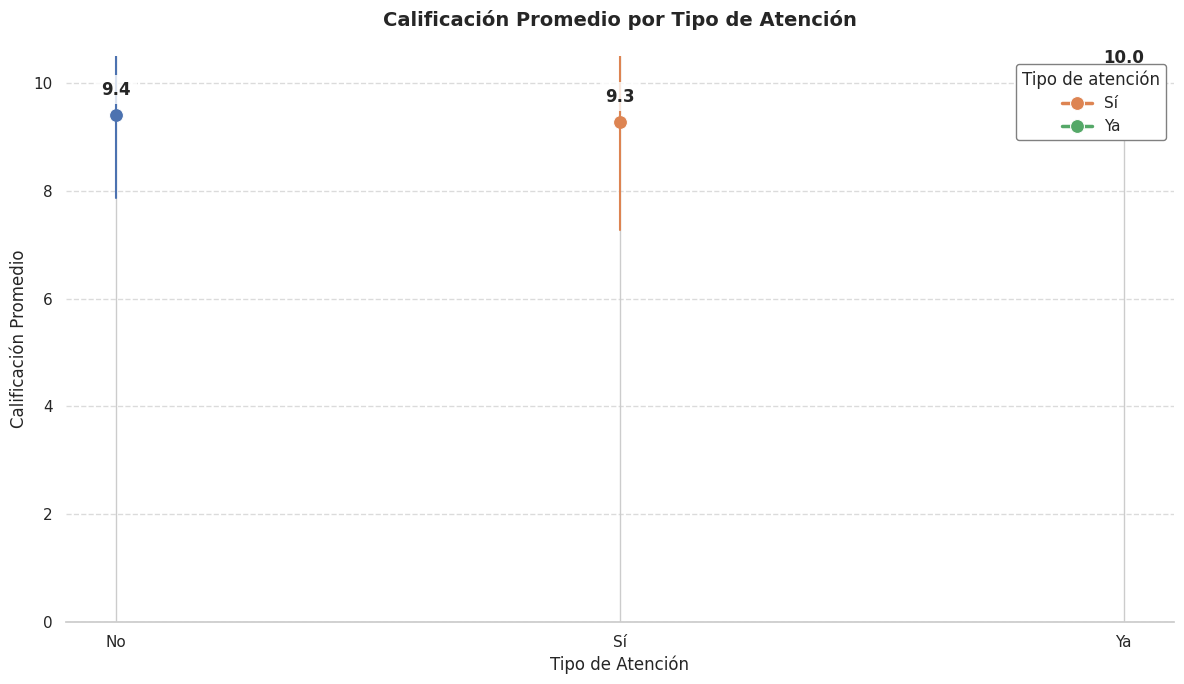

In [ ]:
plt.figure(figsize=(12, 7))
ax = sns.lineplot(data=df_plot,
                 x='Atendido por agente',
                 y='Calificación',
                 hue='Atendido por agente',
                 ci='sd',
                 marker='o',
                 markersize=10,
                 palette=colors[:len(atencion_counts)],
                 style='Atendido por agente',
                 dashes=False,
                 err_style='bars',
                 linewidth=2.5)

# Personalización avanzada
plt.title('Calificación Promedio por Tipo de Atención\n', fontsize=14, fontweight='bold')
plt.xlabel('Tipo de Atención', fontsize=12)
plt.ylabel('Calificación Promedio', fontsize=12)
plt.ylim(0, 10.5)

# Añadir valores exactos
promedios = df_plot.groupby('Atendido por agente')['Calificación'].mean()
for i, (tipo, valor) in enumerate(promedios.items()):
    ax.text(i, valor+0.3,
           f"{valor:.1f}",
           ha='center',
           va='bottom',
           fontsize=12,
           fontweight='bold',
           bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

# Mejorar la leyenda
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[1:], labels[1:],
         title='Tipo de atención',
         title_fontsize=12,
         fontsize=11,
         loc='upper right',
         frameon=True,
         framealpha=1,
         edgecolor='gray')

# Grid y estilo
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
sns.despine(left=True)
plt.tight_layout()
plt.show()